<a href="https://colab.research.google.com/github/PaleoLipidRR/plotting-with-python-intro/blob/main/PWP_01_Intro%20to%20Data%20Visualization%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Python Visualization (version 1.0)**<br/>
Notebook #01: Intro to matplotlib and proplot

By Ronnakrit "Ronnie" Rattanasriampaipong  
Graduate student, Department of Oceanography, TAMU

Created date: 3/22/2021  
Last update: 11/6/2021

---


**DISCLAIMER: This document is created to introduce how to plot data using python. This document will not cover basic elements for python 3 programming languages.**

Generally,the `matplotlib` is the most popular python library that people use to plot graphs, charts, and so on. Here, I will use `ProPlot`" as a wrapper package of the matplotlib for plotting subplots with less repetitive and more readable codes. More information about ProPlot can be found here: https://proplot.readthedocs.io/en/v0.2.3/index.html

In this document, I will not cover basic codings on python 3. So, I would recommend you to get familiar with all the basics. The `stackoverflow` forum is a platform that you can find solutions for almost everything. What you are struggling with, there is a high chance that others do struggle with too.

Krittanon "Pond" Sirorattanakul, a graduate student at Caltech, has put together a good introductory about how to code in Python 3. Feel free to check his tutorial notebook on his GitHub: https://github.com/seismopond/python_intro

---

# **Before we start, let see if you know how to run the codes/scripts in Jupyter notebook**
---

Let's do the classic "Hello World" example but with "Hello cute GDGTs" instead.  `print()` is a function you wanted to used here.\
Just put "Hello cute GDGTs" inside the bracket.

1) Select the cell that you would like to run the codes  
2) Run the codes. You run the cell in a couple different ways. Here are three common ways:  
    &nbsp;&nbsp;&nbsp;&nbsp;2.1) Select the cell (using a mouse), then click "Run" button  
    &nbsp;&nbsp;&nbsp;&nbsp;2.2) Select the cell, then go to "Cell" and "Run Cells"  
    &nbsp;&nbsp;&nbsp;&nbsp;2.3) Keyboard shortcut: Ctrl + Enter (Windows) or Cmd + Return (MacOS)  
3) Create new cells to seperate the codes. This is again a personal preference whether you want to write codes in one cell or to chunk it into smaller multiple sections. Here are three common ways:  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1) Click "+" button -- the new cell will be created below your current cell  
    &nbsp;&nbsp;&nbsp;&nbsp;3.2) Click "Insert" and choose either "Insert Cell Above" or "Insert Cell Below"  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1) Keyboard shortcut: Press "A" for "Insert Cell Above"// Press "B" for "Insert Cell Below"        

In [ ]:
print("Hello cute GDGTs")

Hello cute GDGTs


# **Now, we need to import basic python libraries**
Here is a list of basic libraries required for generating plots using python:

(A) Data science
--
- `numpy` - NumPy (Numerical Python) is a perfect tool for scientific computing and performing basic and advanced array operations. More information: https://numpy.org/
- `scipy` - This useful library includes modules for linear algebra, integration, optimization, and statistics. Its main functionality was built upon NumPy, so its arrays make use of this library. More information: https://scipy.org/
- `pandas` - Pandas is a library created to help developers work with "labeled" and "relational" data intuitively. It's based on two main data structures: "Series" (one-dimensional, like a list of items) and "Data Frames" (two-dimensional, like a table with multiple columns). Pandas allows converting data structures to DataFrame objects, handling missing data, and adding/deleting columns from DataFrame, imputing missing files, and plotting data with histogram or plot box. It’s a must-have for data wrangling, manipulation, and visualization. More information: https://pandas.pydata.org/
- `xarray` -- this package will be used for net4cdf and similar file types. More information: http://xarray.pydata.org/en/stable/


(B) Visualization
--
- `Matplotlib` (required) - This is a standard data science library that helps to generate data visualizations such as two-dimensional diagrams and graphs (histograms, scatterplots, non-Cartesian coordinates graphs). More information: https://matplotlib.org/
- `ProPlot` (optional) - This is my personal favorite package when it comes to generate subplots. This is a wrapper for the Matplotlib that makes subplotting more efficient with fewer lines. More information: https://proplot.readthedocs.io/en/v0.2.3/index.html
- `Seaborn` (optional) - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. More inforamtion: https://seaborn.pydata.org/
- `Cartopy` - Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. More inforamtion: https://scitools.org.uk/cartopy/docs/latest/

---

# **Python packages/libraries installation**
Here is how to import python libraries/packages:  
(You can import everything at the beginning or import them later when you wanted to use a specific package. My preference is to put all the packages I used in the same cell at the beginning). 

- start the line with "import"  
- then space bar and put the name of the package
- then space bar and put "as"
- after "as", put a module name as you like. But the following shows the conventional name that people use for these basic libraries

## Install packages that are not default to google colab
Please uncomment and run the cell below if you use this Jupyter Notebook from Google Colab

In [ ]:
### %%capture is a command to suppress cell's outputs. So, please do not worry if you don't see anything coming out after running the cell. I just don't want to let the installations overwhelming your screen.
%%capture
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
%pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
%pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
%pip install shapely --no-binary shapely
%pip install proplot 
%pip install pyrolite  ### This is to install libraries that are not available in Google Colab

## Import packages/libraries to be used

In [ ]:
import numpy as np
import scipy as scipy
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import proplot as plot

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


### Mount google drive
1.1 Mounting your google drive with Google colab so that you can read files directly from the google drive

In [ ]:
# Mounting your google drive
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT,force_remount=True)

MessageError: ignored

## **Lighting tip #1**

The Jupyter Notebook has **two different keyboard input modes**. 
- Edit mode - allows you to type code or text into a cell and is indicated by a green cell border.
- Command mode - binds the keyboard to notebook level commands and is indicated by a grey cell border with a blue left margin.

To check shortcut keys, type "short..." quickly in the command mode. (press ESC to exit from the Edit mode; you should see your blinking cursor disappear and the cell border color changed from "green" to "blue.")

**Let's try pressing "L" in command mode**  

- First, double click this cell. You will be able to edit the markdown
- Hit "ESC" to change from edit mode to command mode
- Then, press "L" (Google Colab: press "CTRL+M, then CTRL+L)
- You should see that the line number will appear/disappear

To get out of the cell, just run the cell by:
- CTRL+Enter (run the cell) or 
- SHIFT+Enter (run the cell and move to the next cell)

# Matplotlib

## Part 1: `Matplotlib` basics

Most of the examples shown here come from `Matplotlib` tutorials (https://matplotlib.org/stable/tutorials/index.html)


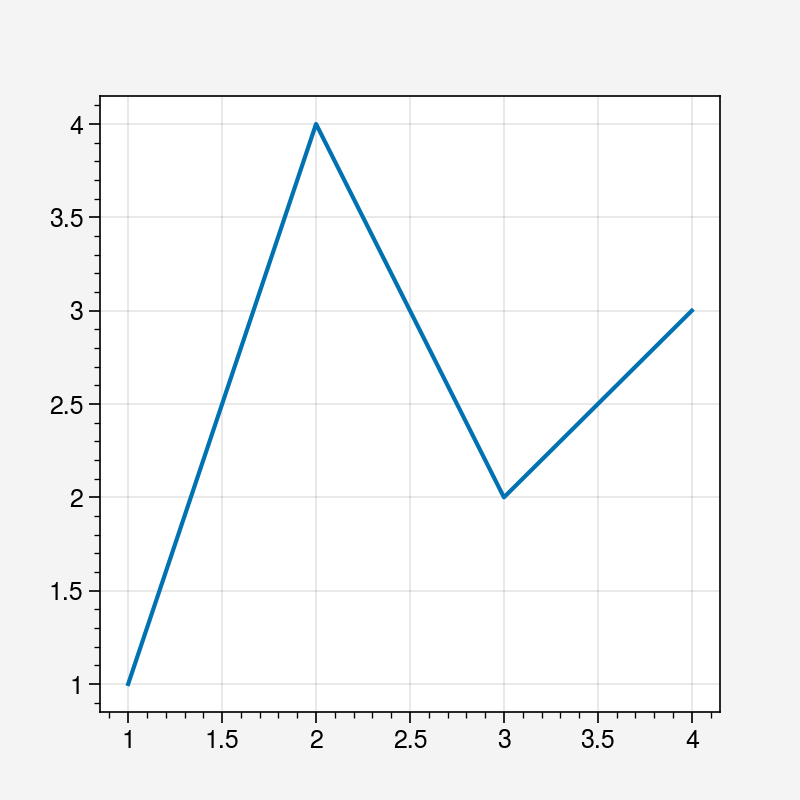

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Another way to do this is using x and y variables.

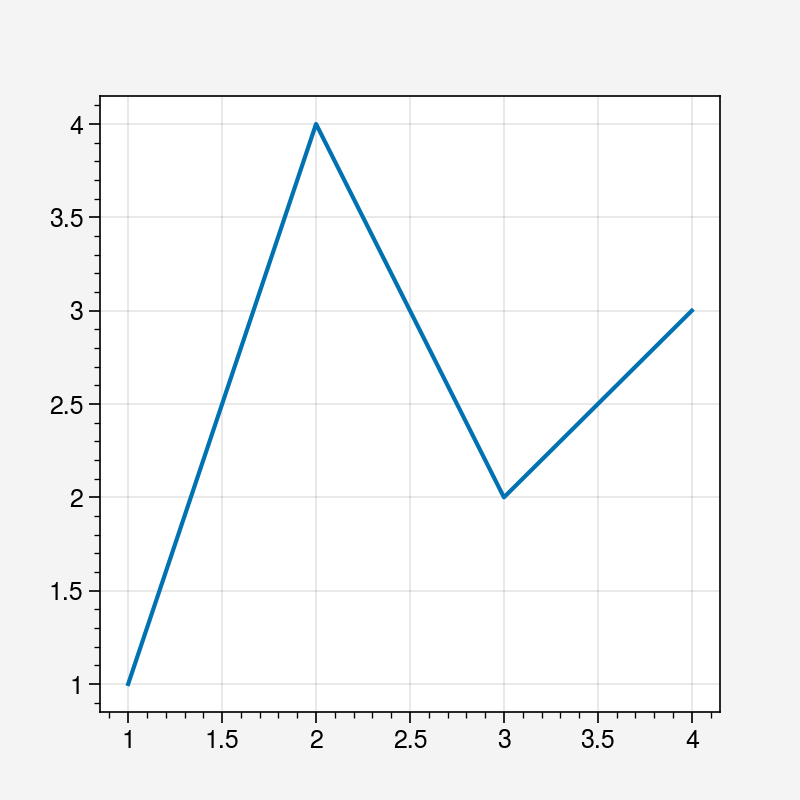

In [ ]:
x = [1, 2, 3, 4] # Create a variable x
y = [1, 4, 2, 3] # Creat a variable y

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)  # Plot some data on the axes.

There are two ways to plot data using matplotlib:
--
The object-oriented interface (OO-type) and the pyplot interface (pyplot-type)

## First type: Object-oriented style (my preferred choice)  
Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").

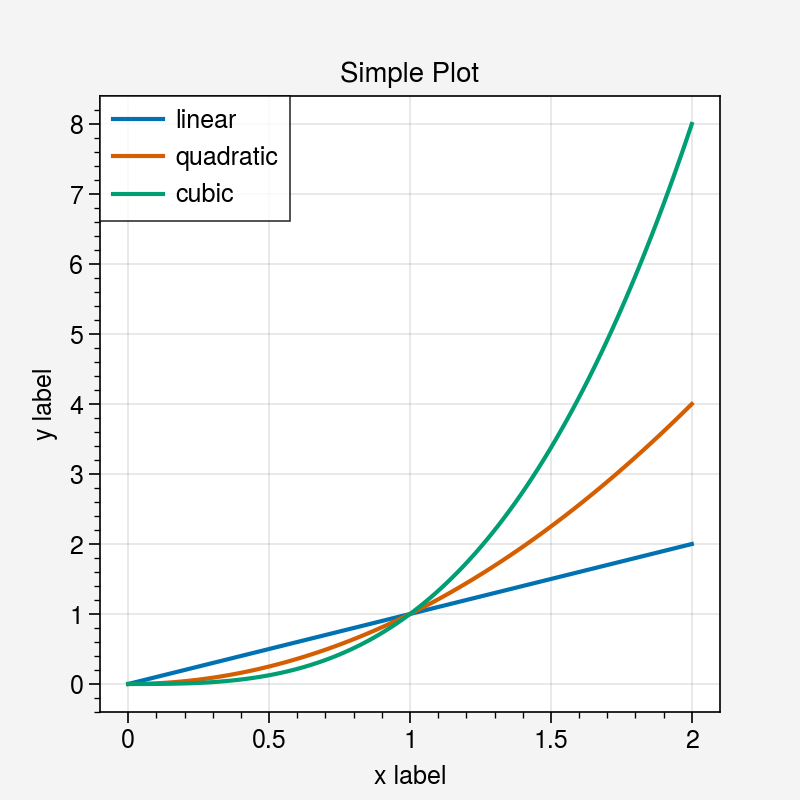

In [ ]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

## Second type: Pyplot style  
Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

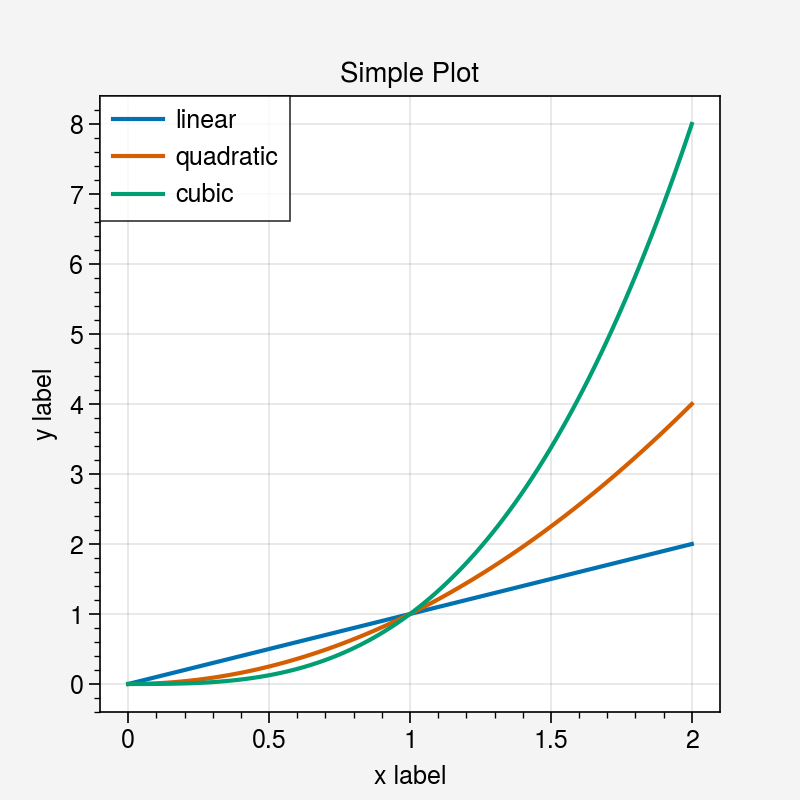

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

1.1 Figure
--
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of Axes, but will typically have at least one.

The easiest way to create a new figure is with pyplot:

In [ ]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 400x400 with 0 Axes>

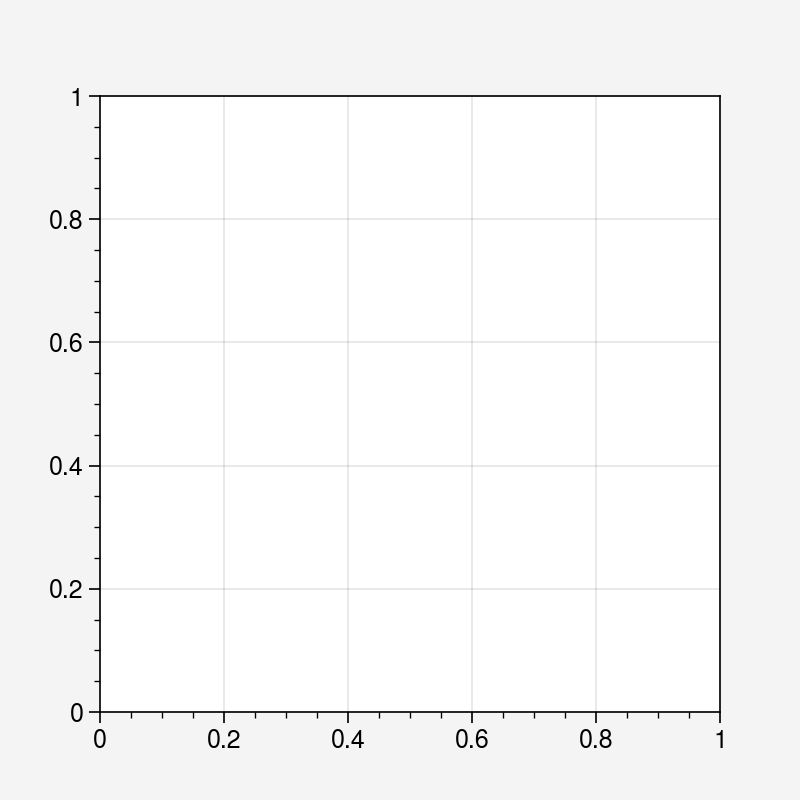

In [ ]:
fig, ax = plt.subplots()  # a figure with a single Axes

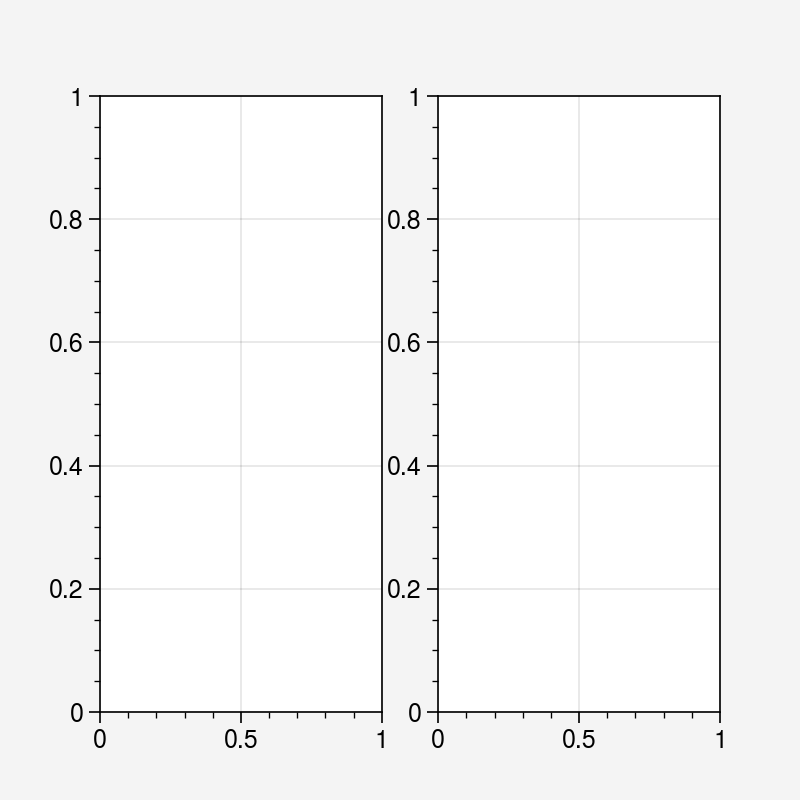

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2)  # a figure with two Axes

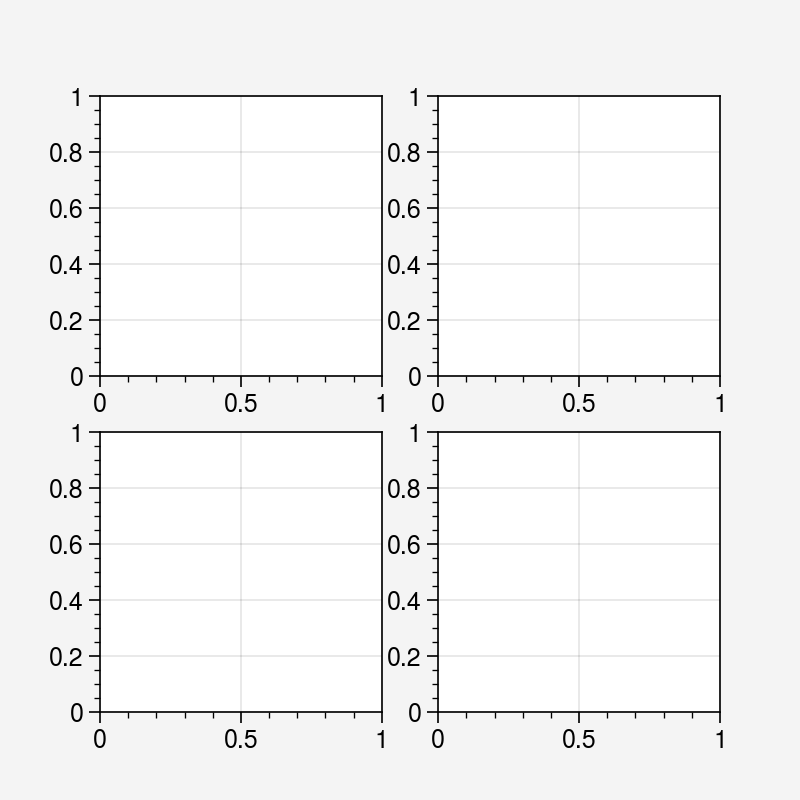

In [ ]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

To adjust your figure size, add "figsize=(L,H)" into your plt.subplots()  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where L = horizontal length  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;and H = vertical height

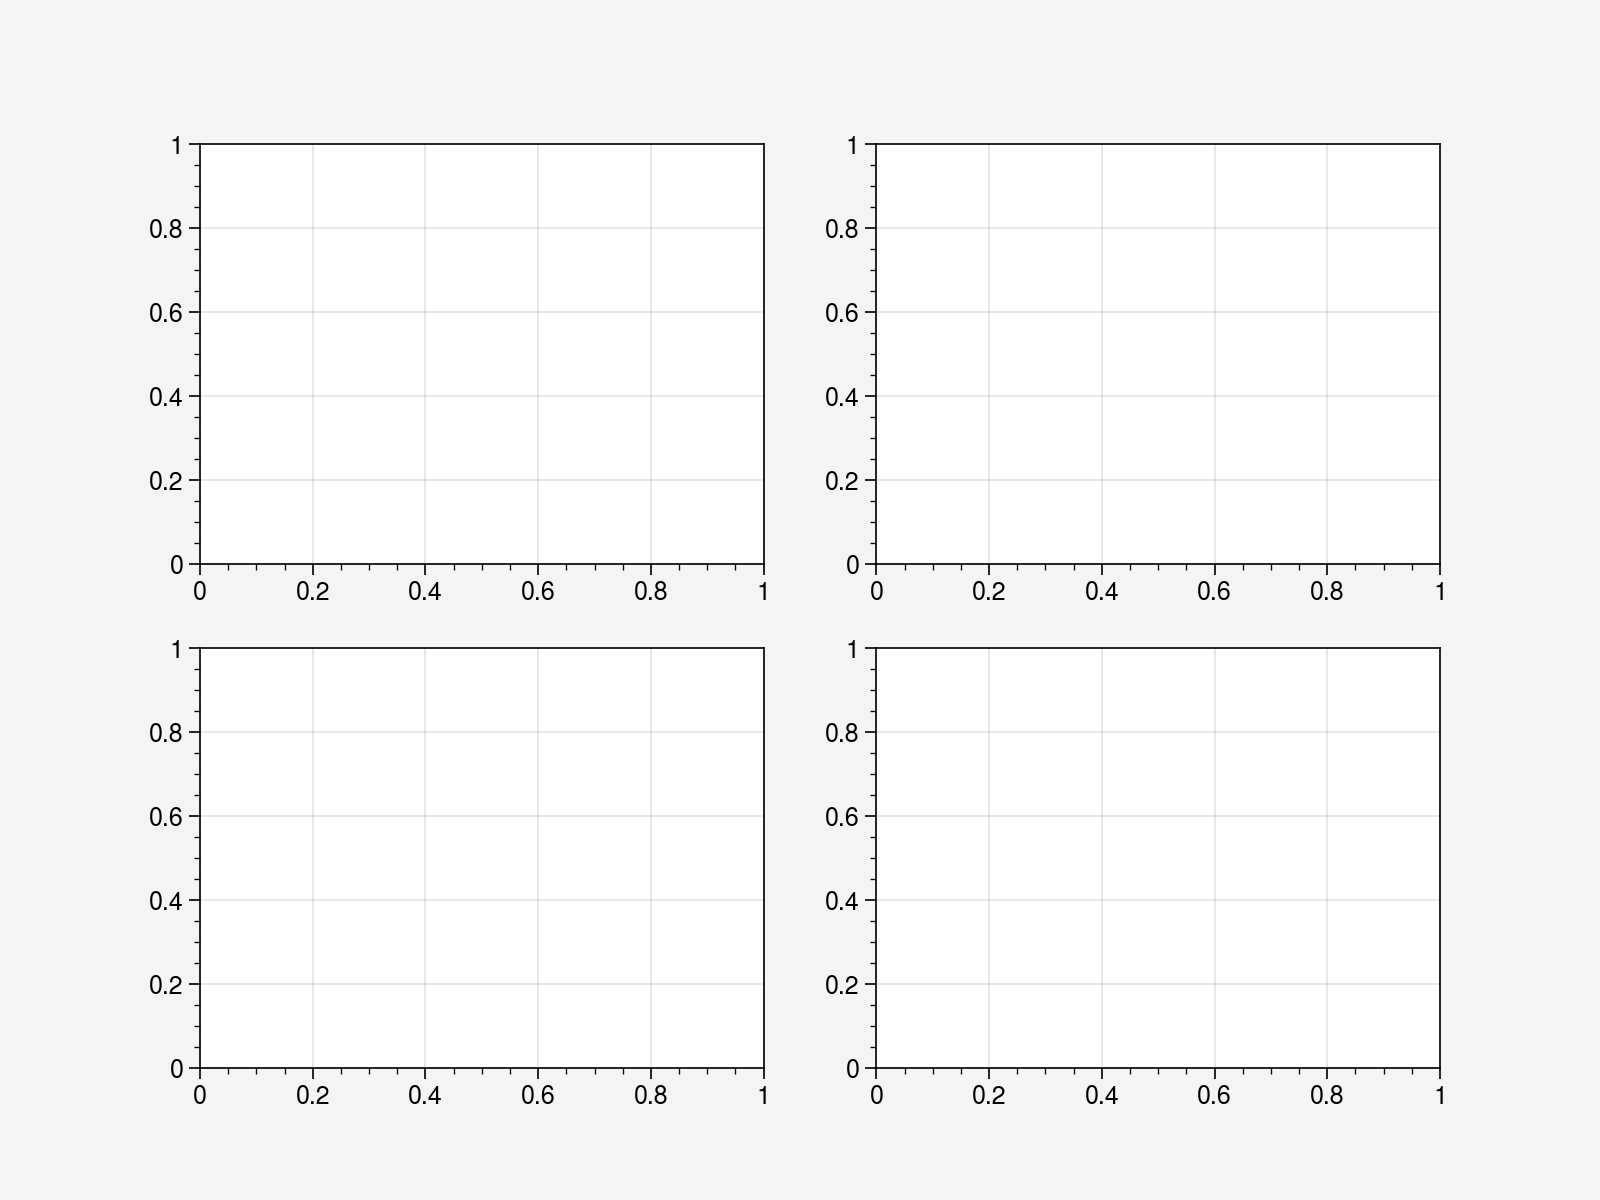

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(8,6))  # using figsize=(,) to adjust you figure size

1.1.1 Axes
---
When you create multiple subplots, each subplot is considered as an axes (axes is NOT the same as axis). You can access to each axes by indicating the axes number. Generally, if you use "axs" as a holder on the line you creat a figure. The first axes can be accessed by calling "axs[0]".

Note: Indexing in python always starts with zero (0).

1.1.1.1 Plotting data -- Accessing the axes
--

Let's try plotting x and y variables on the first axes in the 1x2 subplot grid:

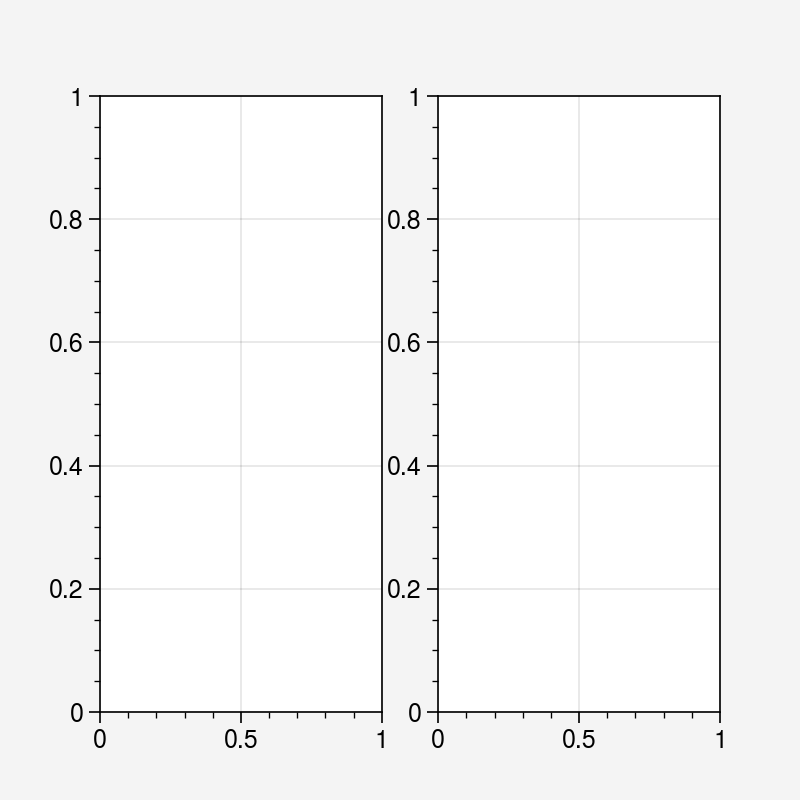

In [ ]:
x = [1, 2, 3, 4] # Create a variable x
y = [1, 4, 2, 3] # Creat a variable y

fig, axs = plt.subplots(1,2)  # a figure with a 2x2 grid of Axes
# fig, axs = plt.subplots(nrows=1,ncols=2) ## This is another way to specify number of columns and rows
ax.plot(x,y)

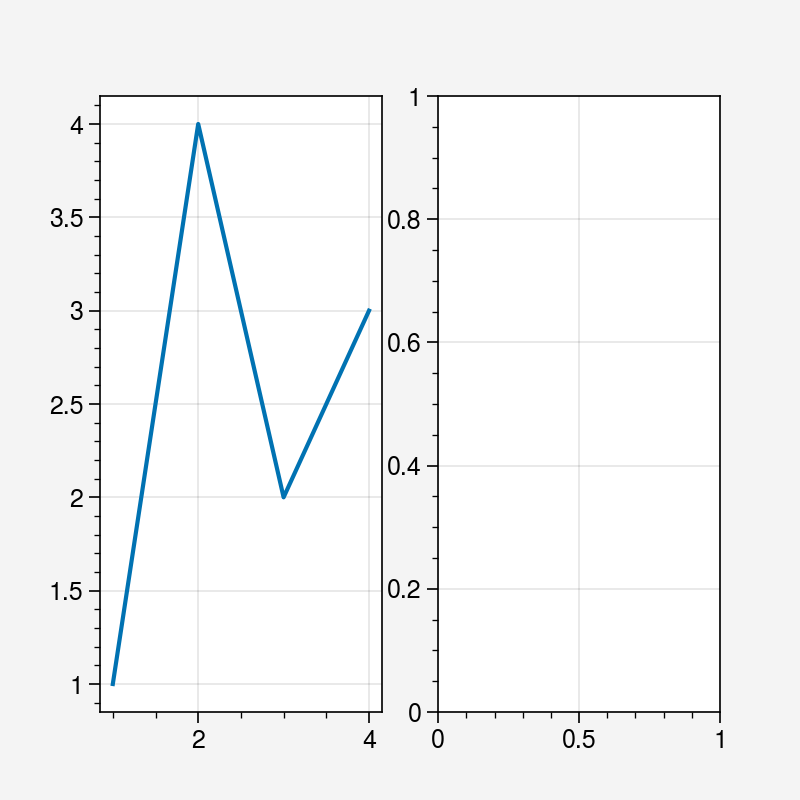

In [ ]:
x = [1, 2, 3, 4] # Create a variable x
y = [1, 4, 2, 3] # Creat a variable y

fig, axs = plt.subplots(1,2)  # a figure with a 2x2 grid of Axes
# fig, axs = plt.subplots(nrows=1,ncols=2) ## This is another way to specify number of columns and rows
axs[0].plot(x,y)

Let's try plotting x and y variables on the first axes in the 2x2 subplot grid:

AttributeError: ignored

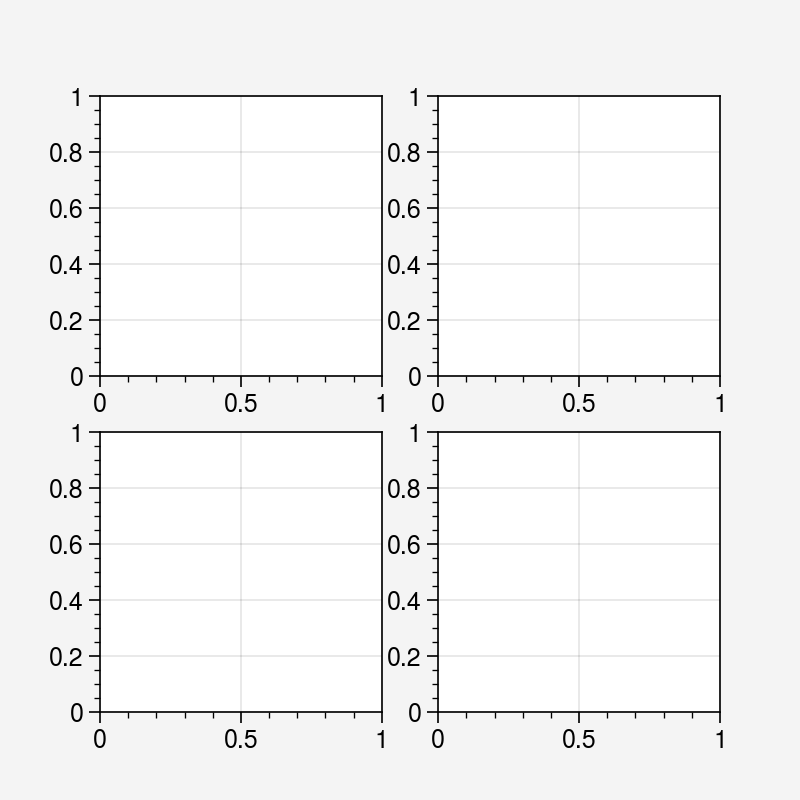

In [ ]:
x = [1, 2, 3, 4] # Create a variable x
y = [1, 4, 2, 3] # Creat a variable y

fig, axs = plt.subplots(nrows=2,ncols=2)  # a figure with a 2x2 grid of Axes
axs[0].plot(x,y)

Getting an error message?!  

No worries. Now, you just need to indicate the coordinate of the axes you wanted to plot the data on. See an example below to plot the data on the top-left axis by indicating "axs[0,0]" where the first number is ROW and the second number is COLUMN.

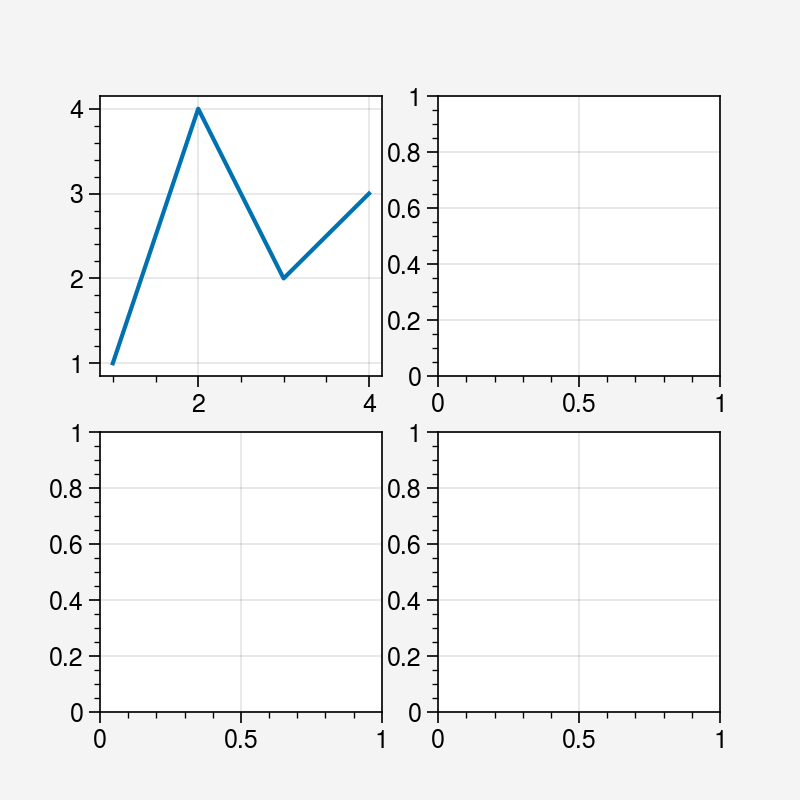

In [ ]:
x = [1, 2, 3, 4] # Create a variable xิ
y = [1, 4, 2, 3] # Creat a variable y

fig, axs = plt.subplots(nrows=2,ncols=2)  # a figure with a 2x2 grid of Axes
axs[0,0].plot(x,y)

Or using "ProPlot" (my personal preference)
--

ProPlot is a wrapper of matplotlibs that will make your code cleaner. (But there are still some limitations that we need to code with matplotlib commands)

<a list of 1 Line2D objects>

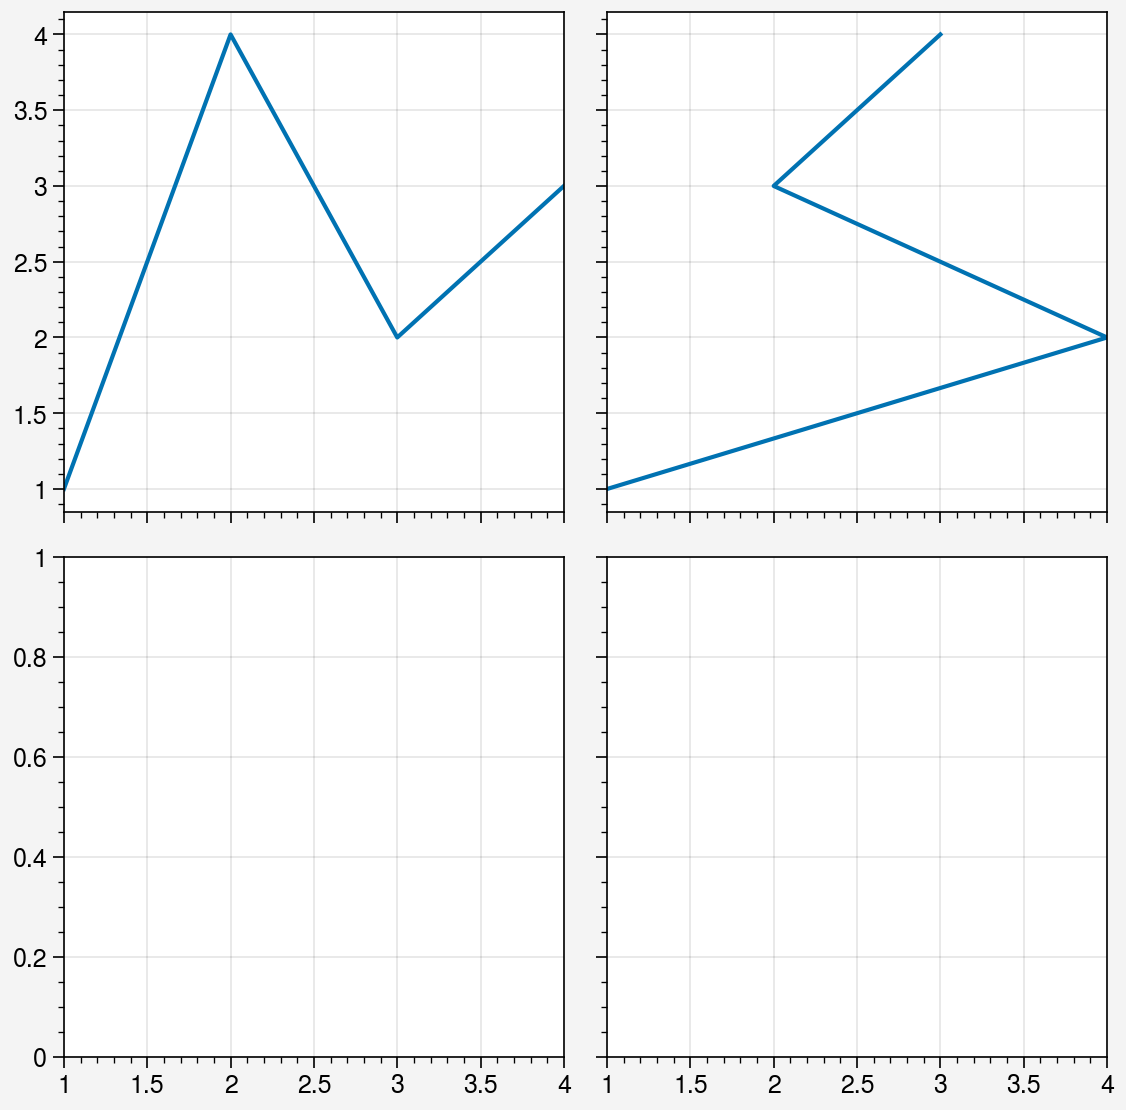

In [ ]:
x = [1, 2, 3, 4] # Create a variable xิ
y = [1, 4, 2, 3] # Creat a variable y

fig, axs = plot.subplots(nrows=2,ncols=2)  # a figure with a 2x2 grid of Axes
axs[0].plot(x,y) #Now you can call axs[0] from the 2x2 subplot grid instead of axs[0,0]
axs[1].plot(y,x) #The number will count from left to right first, then start on the next row from the left again.

# Example 1: TEX86 data

## 1. Import CSV files
(similar approaches are also used for excel spreasheets)
### Using Tierney and Tingley (2015) Global Core-top TEX86 as an example
Data source:https://www.nature.com/articles/sdata201529#Sec10

### Let's try to plot TEX86 vs latitude

#### 1.1 First, import the data into Pandas dataframe

In [ ]:
import pandas as pd

# filepath = "G:\\Shared drives\\Zhang Lab\\Presentations\\Knowledge sharing\\Python Data Visualization\\files for workshop\\"
filepath = "/content/drive/MyDrive/PWP_online_RR/datasets/TEX86_coretop/"
filename = "TEXdatabase_v1.csv"


#skiprows command is used to skep the first line 
#(try to run the code without skip rows)
tex_df = pd.read_csv(filepath+filename,skiprows=1) 

tex_df

,core_name,core_type,sample_depth_start,sample_depth_end,longitude,latitude,depth,tex86,WOA09_SST,OISST_SST,WOA09_subT,fGDGT_0,fGDGT_1,fGDGT_2,fGDGT_3,fGDGT_cren,fGDGT_cren',reference_name,reference_link
0,GeoB7702-3,GC,5.0,6.0,34.073300,31.651700,562,0.662,22.0,22.5,18.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,Castaneda et al. (2010) Paleoceanography,http://dx.doi.org/10.1029/2009PA001740
1,KNR195-5-17 MC42,MC,0.0,1.0,-89.685500,-1.253000,615,0.563,23.1,23.8,17.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"Chazen, C. (2011) PhD. Thesis, Brown University",https://repository.library.brown.edu/studio/it...
2,KNR195-5-9 MC22,MC,0.0,1.0,-81.250000,-3.850300,689,0.567,22.2,22.3,16.3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"Chazen, C. (2011) PhD. Thesis, Brown University",https://repository.library.brown.edu/studio/it...
3,KNR195-5-15 MC38,MC,0.0,1.0,-89.699300,-1.265700,597,0.567,23.1,23.8,17.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"Chazen, C. (2011) PhD. Thesis, Brown University",https://repository.library.brown.edu/studio/it...
4,KNR195-5-8 MC18,MC,0.0,1.0,-81.310000,-3.986700,1020,0.568,22.2,22.3,16.3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"Chazen, C. (2011) PhD. Thesis, Brown University",https://repository.library.brown.edu/studio/it...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,64PE301 P1500,MC,0.0,0.5,63.075000,22.078333,1495,0.730,26.6,26.7,23.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,Lengger et al. (2014) Geochimica et Cosmochimi...,http://dx.doi.org/doi:10.1016/j.gca.2014.07.013
1091,64PE301 P1800,MC,0.0,0.5,63.408333,22.308333,1786,0.730,26.6,26.8,23.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,Lengger et al. (2014) Geochimica et Cosmochimi...,http://dx.doi.org/doi:10.1016/j.gca.2014.07.013
1092,64PE301 P2000,MC,0.0,0.5,63.018611,22.144722,1970,0.720,26.6,26.7,23.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,Lengger et al. (2014) Geochimica et Cosmochimi...,http://dx.doi.org/doi:10.1016/j.gca.2014.07.013
1093,64PE301 P2500,MC,0.0,0.5,62.895000,22.104722,2470,0.720,26.6,26.7,23.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,Lengger et al. (2014) Geochimica et Cosmochimi...,http://dx.doi.org/doi:10.1016/j.gca.2014.07.013


#### 1.2 Create variables from selected columns

In [ ]:
tex86 = tex_df.tex86
lat = tex_df.latitude
woa09_sst = tex_df.WOA09_SST

#### Lighting tip #2

There are 2 ways that you can grab a column from pandas dataframe:
- 1) The first method is using square bracket ([]). Using the example from the cell above, to get the "tex86" column in the a variable name "tex86", we can write the code as follow:  
    - tex86 = tex_df['tex86']  
    Note: What you do we see here:
        - tex86 on the left-hand side is the variable that will take values/array from the right
        - tex_df is the dataframe that contains data from the imported data file
        - ['tex86'] is to tell pandas that you want to grab a column name 'tex86' in the dataframe
- 2) The second method is what I used in the cell above. Instead of using square bracket, you can use "." to tell pandas that you wanted to grab a column name "tex_86". Please be noted that this method can be used if our column names do not have space in their names.

#### Lighting tip #3

Your dataframe has too many columns, and you don't want to scroll the table to find what you are looking for. What can you do?
Pandas has a command called "columns". You can print the list of all column names from you dataframe as shown in the cell below. Remember that now our dataframe name is "tex_df". "tex_df.columns" will list all column headers. 

In [ ]:
tex_df.columns

Index(['core_name', 'core_type', 'sample_depth_start', 'sample_depth_end',
       'longitude', 'latitude', 'depth', 'tex86', 'WOA09_SST', 'OISST_SST',
       'WOA09_subT', 'fGDGT_0', 'fGDGT_1', 'fGDGT_2', 'fGDGT_3', 'fGDGT_cren',
       'fGDGT_cren'', 'reference_name', 'reference_link'],
      dtype='object')

#### 1.4 Plotting scatter plots of SST and TEX86 versus latitudes

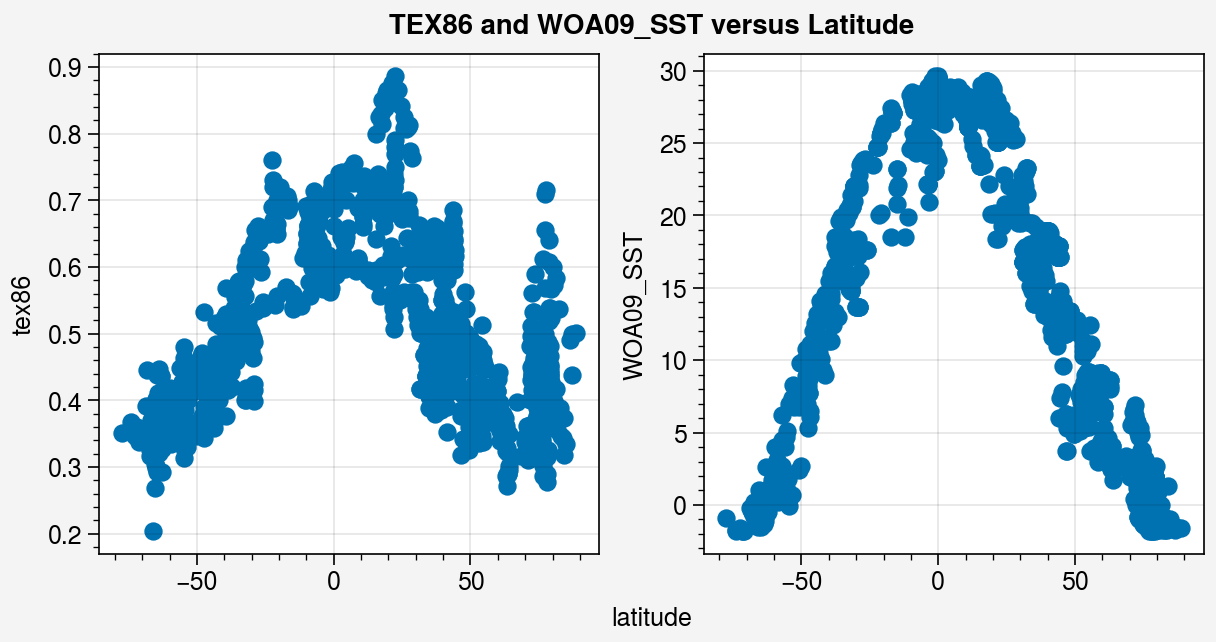

In [ ]:
#create a figure with 1x2 subplots (axes)
fig, axs = plot.subplots(ncols=2, sharey=False)

#format all axes in the figure by using axs without specified the axes number
axs.format(
    suptitle='TEX86 and WOA09_SST versus Latitude'
)



ax = axs[0]
ax.scatter(lat,tex86)

ax = axs[1]
ax.scatter(lat,woa09_sst)

plot.show()

#### 1.4.1 Changing plotting parameters

Let's change the color of the data:
- change SST data to be red
- add border line of the marker

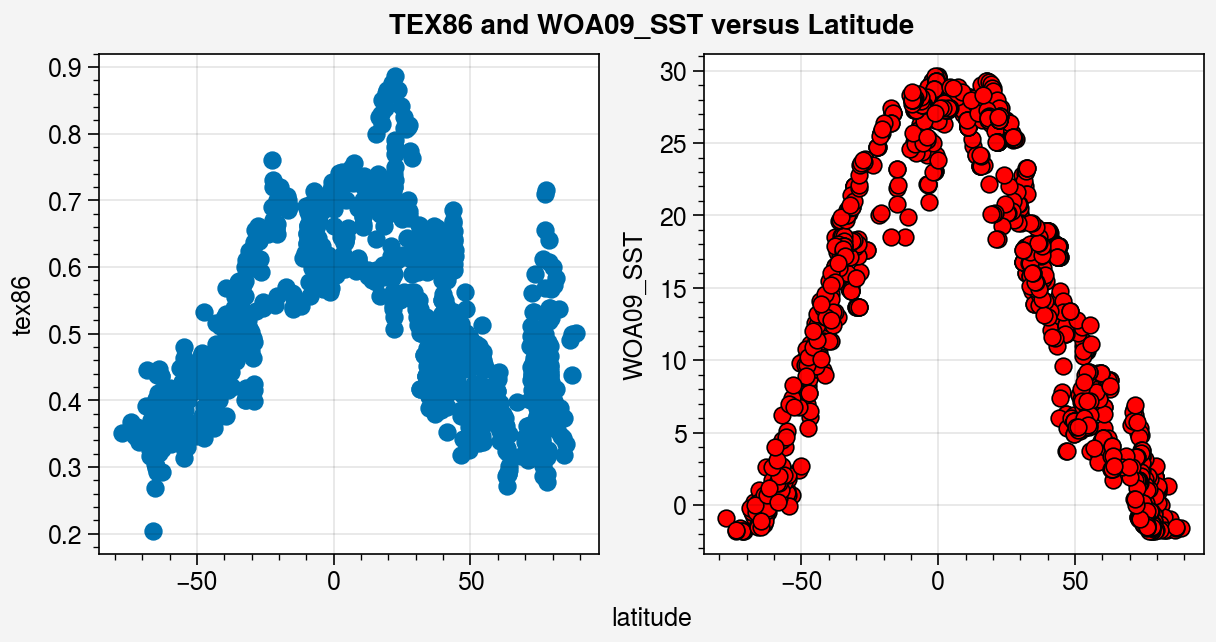

In [ ]:
#create a figure with 1x2 subplots (axes)
fig, axs = plot.subplots(ncols=2, sharey=False)

#format all axes in the figure by using axs without specified the axes number
axs.format(
    suptitle='TEX86 and WOA09_SST versus Latitude'
)



ax = axs[0]
ax.scatter(lat,tex86)

ax = axs[1]
ax.scatter(lat,woa09_sst,c='r',edgecolor='k')

plot.show()

#### Lighting tip #4: Don't know what color to be used or don't know what is the name of each color

1) Google "color name python matplotlib" or "color name proplot python"  
2) print the color list  
    - fig, axs = plot.show_colors()  

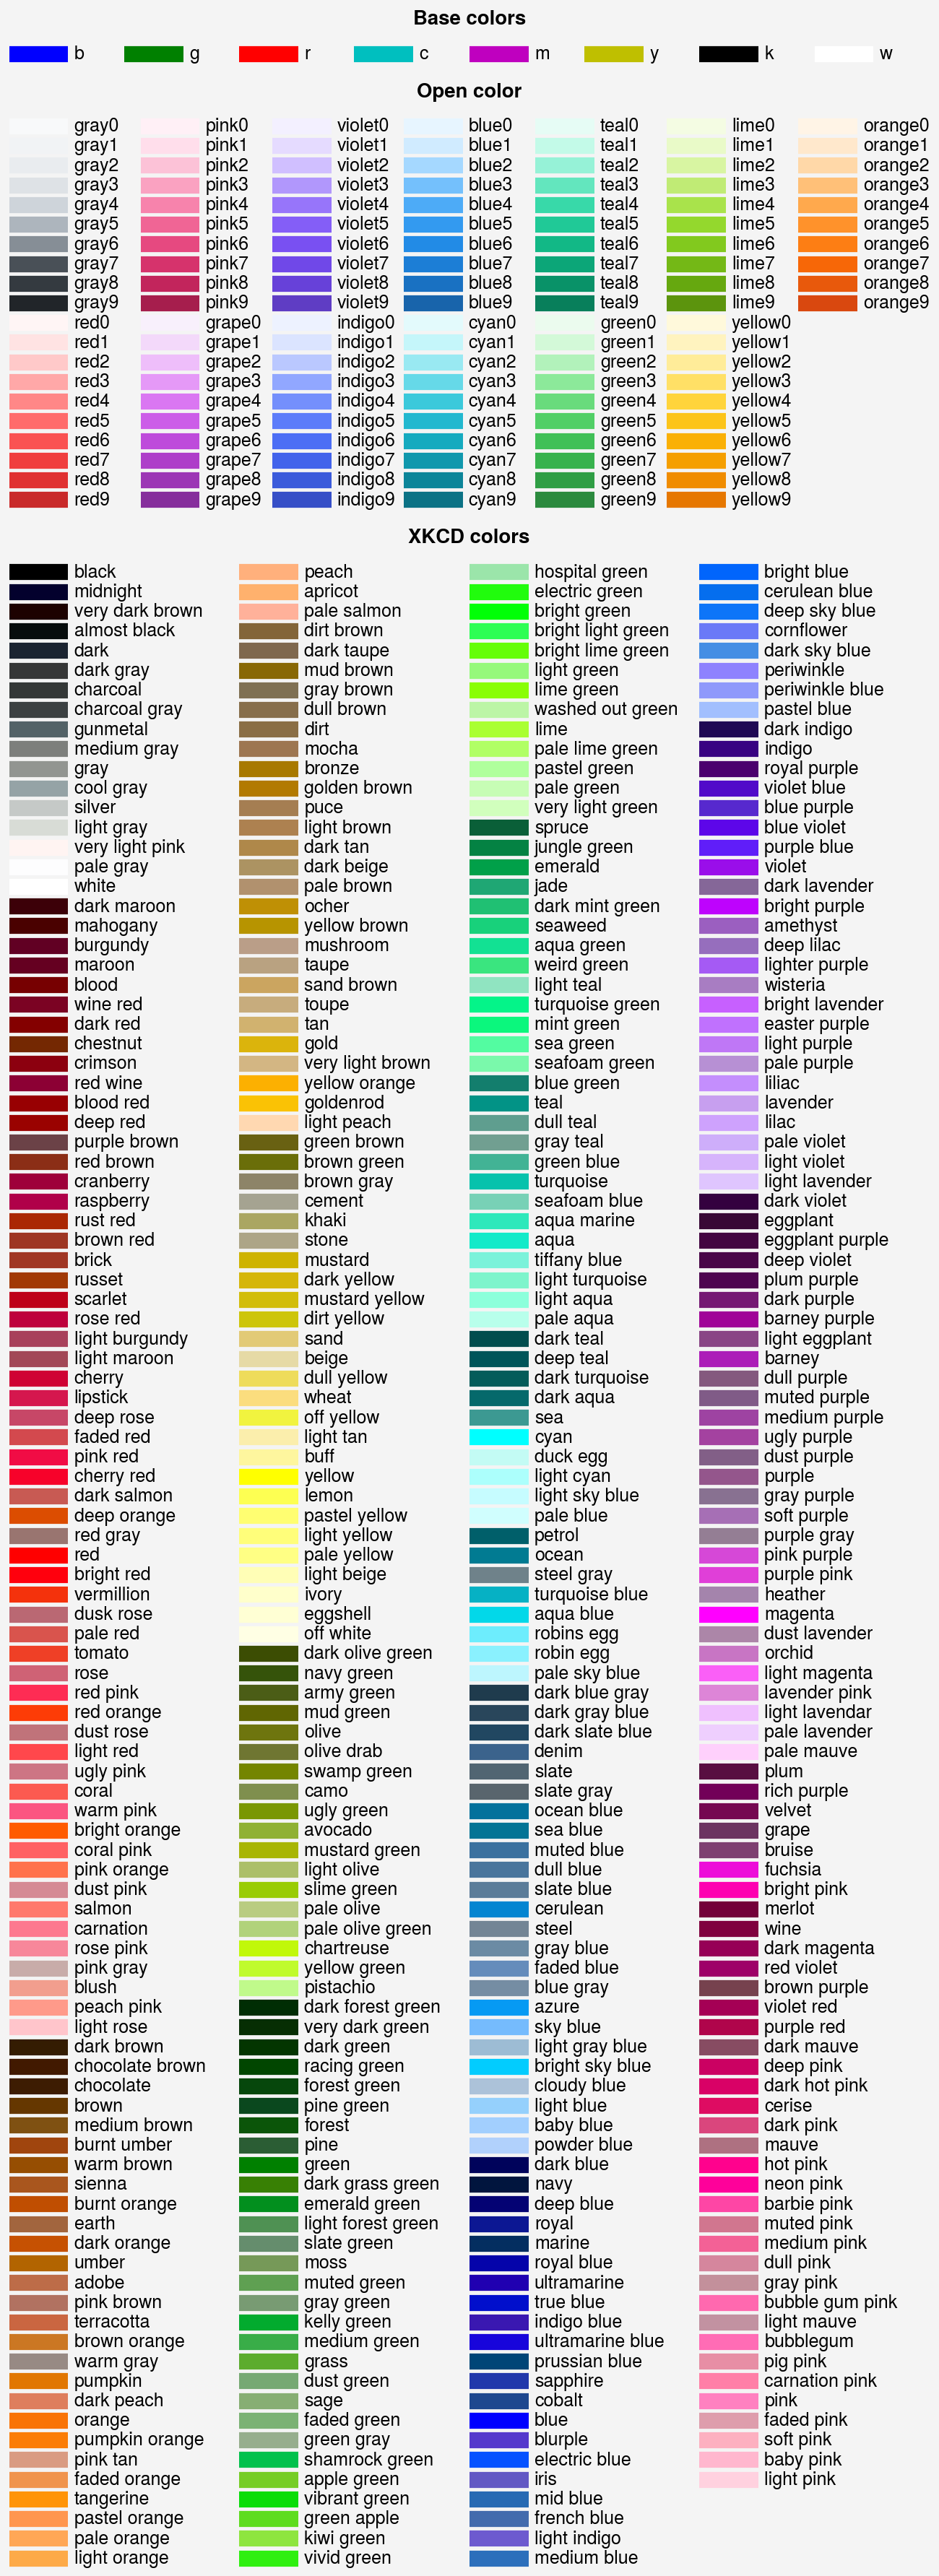

In [ ]:
fig, axs = plot.show_colors()

#### 1.5 Let's try plotting TEX86 vs SST and change the color datapoint using colormap

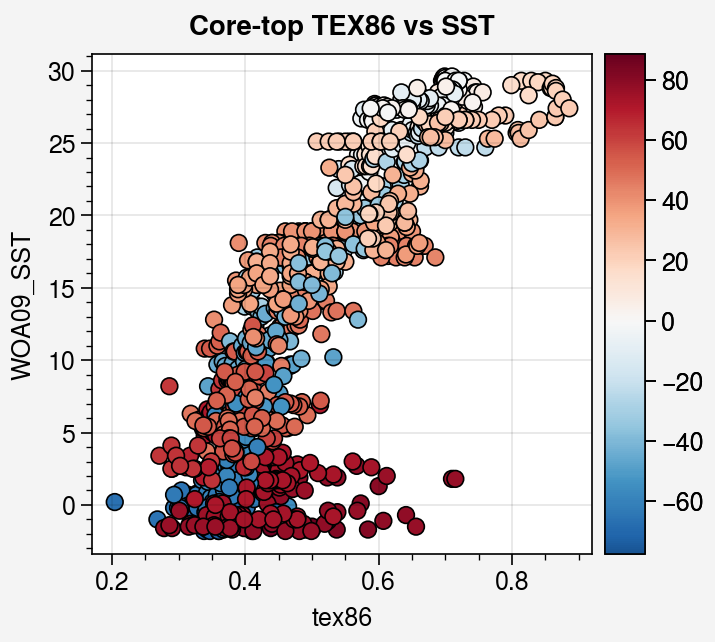

In [ ]:
fig, axs = plot.subplots()
axs.format(
    suptitle="Core-top TEX86 vs SST"
)

h = axs[0].scatter(tex_df.tex86,tex_df.WOA09_SST,edgecolor='k',color=tex_df.latitude)
axs[0].colorbar(h) #add a colorbar for the axs[0]

#### Lighting tip #4: Wanted to change the colormap but don't know what options are available?

1) Google "colormap python matplotlib" or "color cycle proplot python"  
2) print the color list   
    - fig, axs = plot.show_cycles() OR
    - fig, axs = plot.show_cmaps()

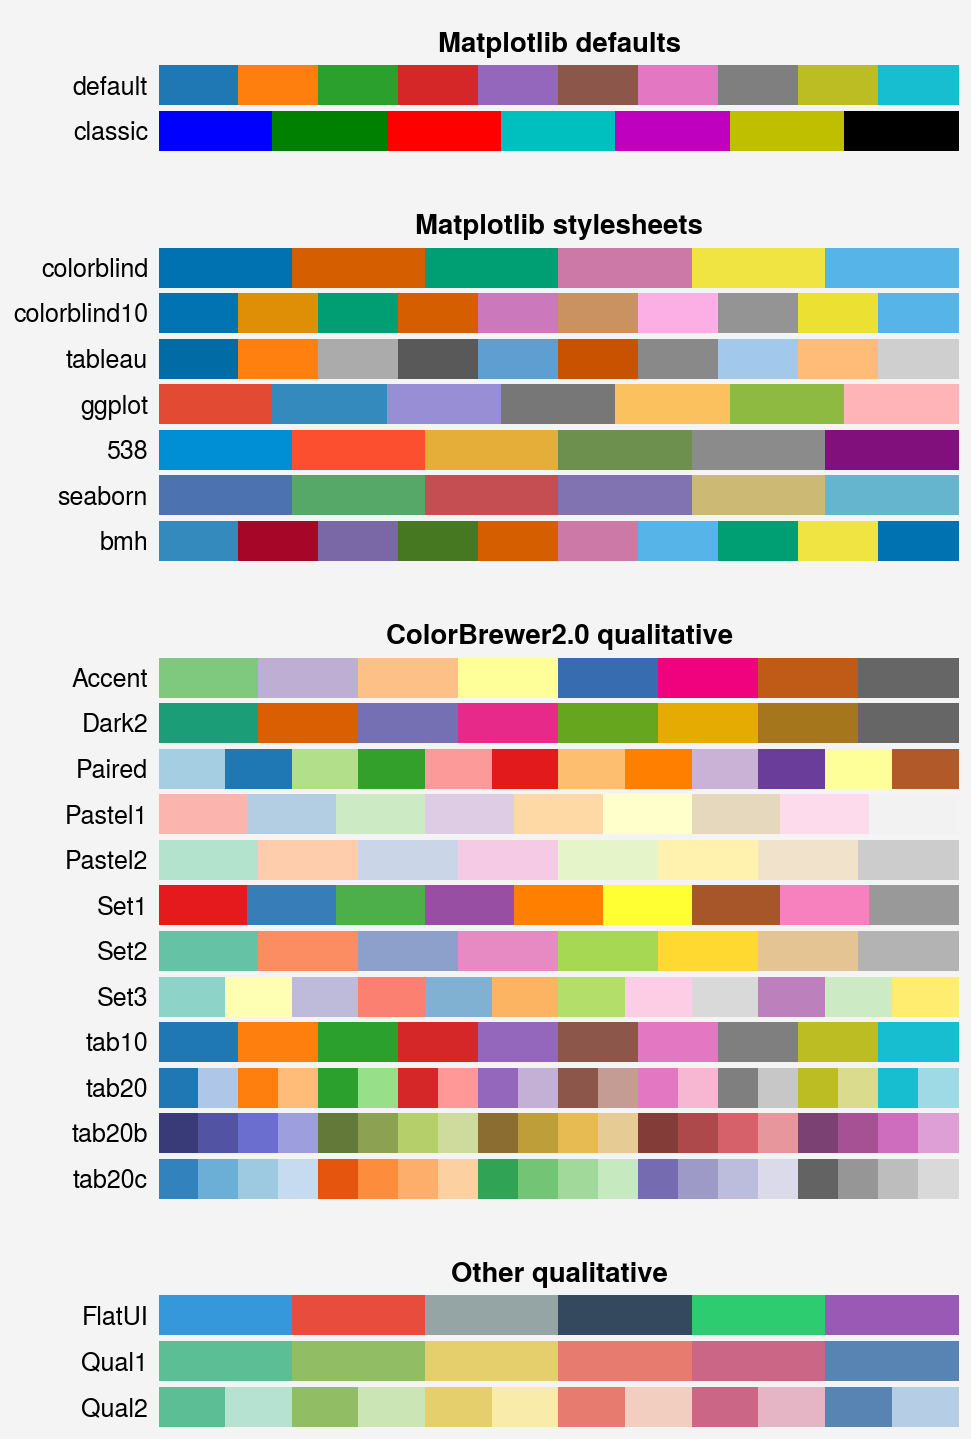

In [ ]:
fig, axs = plot.show_cycles()

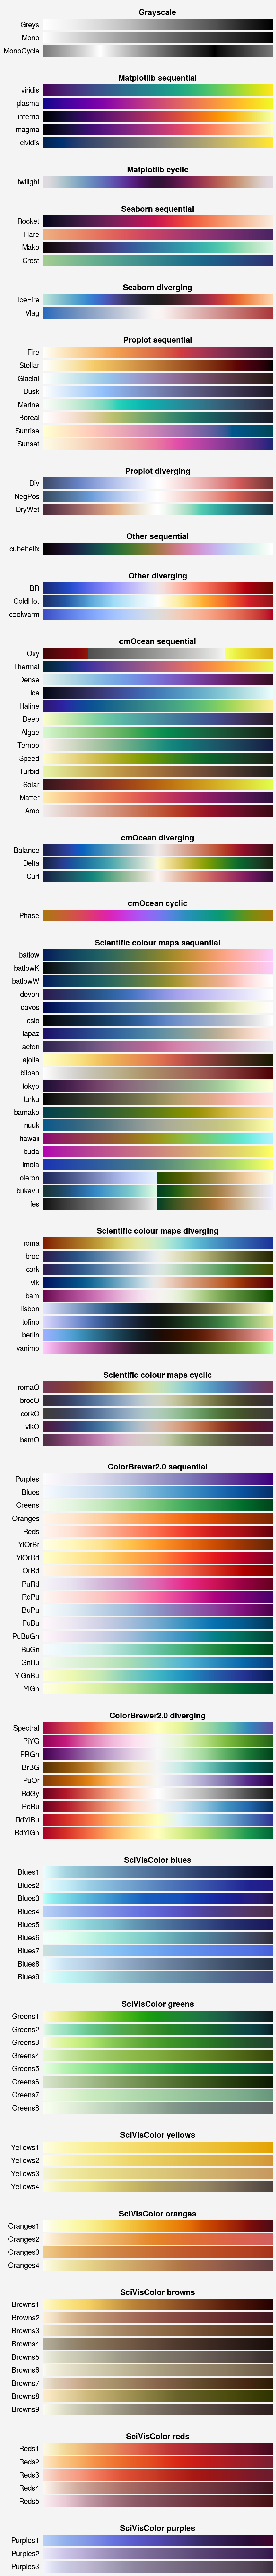

In [ ]:
fig, axs = plot.show_cmaps()

#### 1.5.1 Changing plotting parameters

- using 'Balance' cmaps
- change the scale of the colormap from -80 to 100 --> -90 to 90

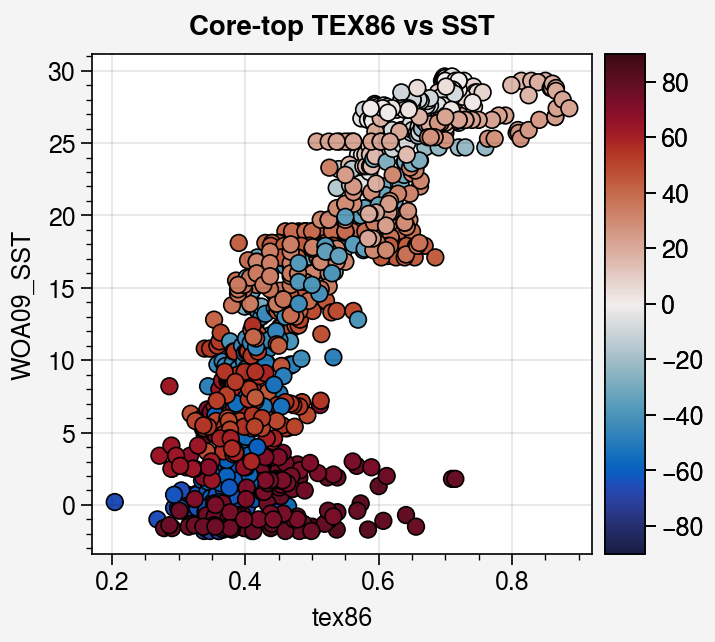

In [ ]:
fig, axs = plot.subplots()
axs.format(
    suptitle="Core-top TEX86 vs SST"
)

h = axs[0].scatter(tex_df.tex86,tex_df.WOA09_SST,edgecolor='k',color=tex_df.latitude,
                   cmap='Balance',vmin=-90,vmax=90)
axs[0].colorbar(h,values=(-90,90)) #add a colorbar for the axs[0]

# Example 2: CO2 data from World Bank

1. Let's import the data

Source: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC/

In [ ]:
filepath = "/content/drive/MyDrive/PWP_online_RR/datasets/CO2_emissions_worldBank/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114/"
filename = "API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv"

In [ ]:
df = pd.read_csv(filepath+filename,skiprows=3) 
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

2. Let's plot CO2 of Thailand from 1960 to 2020

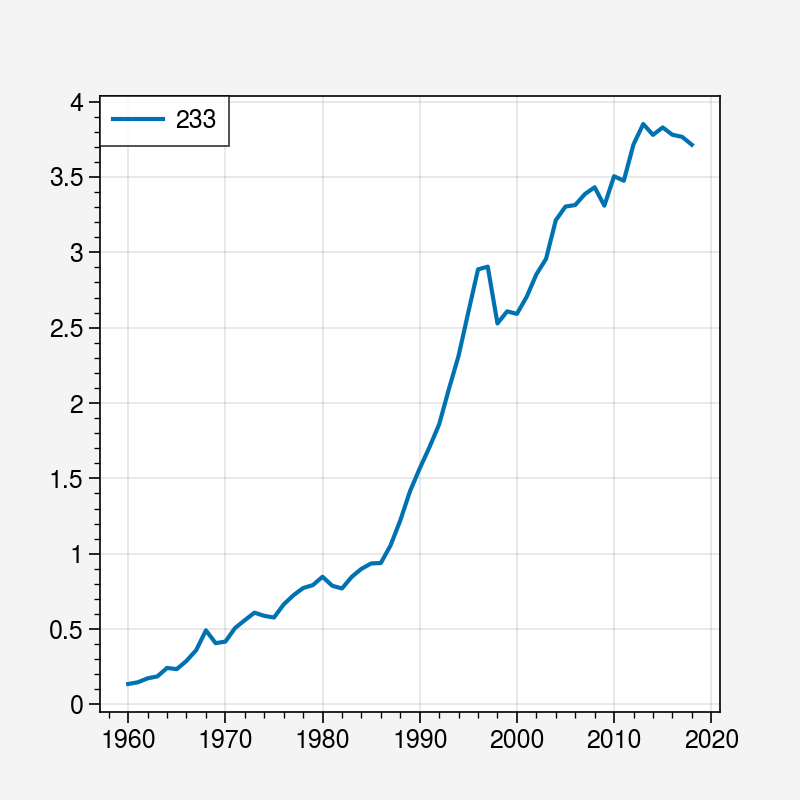

In [ ]:
# test = df[df['Country Name']=='Thailand'].iloc[:,4:].T
# test.plot()
